In [1]:
import pandas as pd
dtype_dict = {
    18: object,   # Column 18
    26: object,   # Column 26
    70: object,   # Column 70
    72: object,   # Column 72
    85: object,   # Column 85
    131: str   # Column 131
}
df = pd.read_csv(r'C:\Users\kaavy\OneDrive\Documents\Data Think\cejst.csv', dtype=dtype_dict) # load cejst dataset

In [2]:
hazard = pd.read_csv(r'C:\Users\kaavy\OneDrive\Documents\Data Think\Hazardous Waste Sites.csv') # load dataset containing data on hazard site locations
hazard[['latitude', 'longitude']] = hazard['LATITUDE/ LONGITUDE'].str.split('/', expand=True) # split the column
hazard['latitude'] = pd.to_numeric(hazard['latitude']) # convert column type
hazard['longitude'] = pd.to_numeric(hazard['longitude']) # convert column type

In [3]:
hazard.head() 

,HANDLER ID,NAME,STREET,CITY,COUNTY,STATE,ZIP CODE,LATITUDE/ LONGITUDE,latitude,longitude
0,GAR000088906,1101 DONNELLY AVE LLC,1101 DONNELLY AVENUE SW,ATLANTA,FULTON,GA,30310,33.73116/-84.42381,33.731160,-84.423810
1,GAR000097030,1655 WEST BROAD LLC,1655 W BROAD ST,ATHENS,CLARKE,GA,30606,NaN,NaN,NaN
2,GA3570026119,165 AIRLIFT WING AND COMBAT READINESS TRAINING...,1401 ROBERT B MILLER JR ROAD,SAVANNAH,CHATHAM,GA,31408,32.13235/-81.18673,32.132350,-81.186730
3,GAR000094748,20/20 CUSTOM MOLDED PLASTICS,960 ALMON ROAD,COVINGTON,NEWTON,GA,30014,33.628302/-83.945793,33.628302,-83.945793
4,GAR000094029,222 MITCHELL STREET,222 MITCHELL STREET,ATLANTA,FULTON,GA,30303,33.75201/-84.39501,33.752010,-84.395010


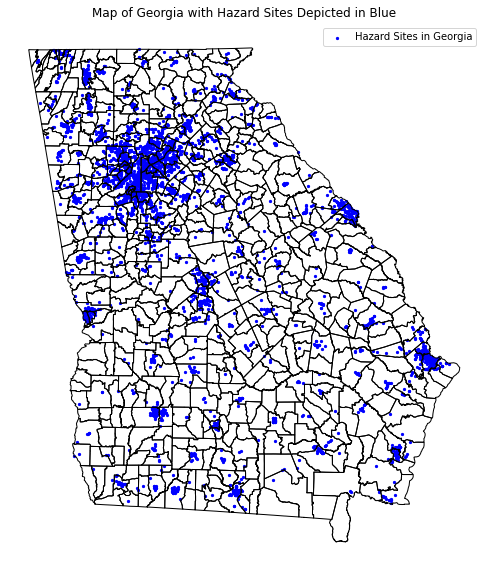

In [6]:
from geopandas.tools import sjoin
import geopandas as gpd
import matplotlib.pyplot as plt
georgia = gpd.read_file(r'C:\Users\kaavy\OneDrive\Documents\Data Think\tl_2019_13_cousub.shp') # import shape file on georgia
gdf = gpd.GeoDataFrame(hazard, geometry=gpd.points_from_xy(hazard.longitude, hazard.latitude), crs=georgia.crs) # create gdf using hazard data and georgia map data


gdf_within_georgia = sjoin(gdf, georgia, how="inner") # Perform a spatial join to identify which points are within Georgia's boundary


fig, ax = plt.subplots(figsize=(10, 10)) # Create the plot


georgia.boundary.plot(ax=ax, linewidth=1, color="black") # Plot the map of Georgia


gdf_within_georgia.plot(ax=ax, marker="o", color="blue", markersize=5, label="Hazard Sites in Georgia") # Plot the hazard points that are within Georgia

plt.title("Map of Georgia with Hazard Sites Depicted in Blue") # title the plot
plt.legend()
plt.axis("off")
plt.show()

C:\Users\kaavy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


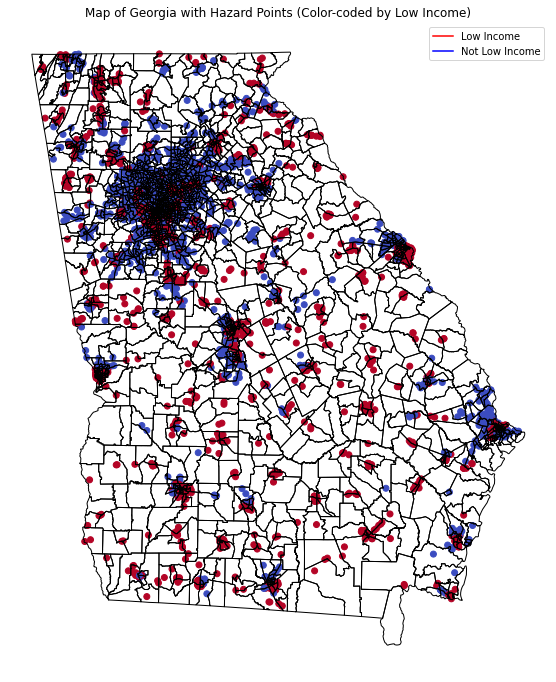

In [8]:
hazard_geometry = gpd.points_from_xy(hazard.longitude, hazard.latitude) # create hazard geometry based on longitude and latitude data from hazard
gdf_hazard = gpd.GeoDataFrame(hazard, geometry=hazard_geometry, crs=georgia.crs) # create gdf based on hazard
tract = gpd.read_file(r"C:\Users\kaavy\OneDrive\Documents\Data Think\gz_2010_13_140_00_500k.shp") # import shape file where georgia locations are based on tract
tract["GEO_ID"] = tract["GEO_ID"].str.replace("1400000US", "") # remove state identifier from geo id
tract["Census tract 2010 ID"] = tract["GEO_ID"] # rename column

df["Census tract 2010 ID"] = df["Census tract 2010 ID"].astype(str) # change column type



joined_data = gpd.sjoin(gdf_hazard, tract, how='left', op='within') # perform a spatial join between gdf_hazard and tract to associate hazard points with tracts


merged_df = joined_data.merge(df, on='Census tract 2010 ID', how='left') # merge the data frames




fig, ax = plt.subplots(figsize=(12, 12))
tract.boundary.plot(ax=ax, linewidth=1, color="black") # plot map based on tracts
merged_df.plot(ax=ax, column='Is low income?', legend=True, cmap='coolwarm') # plot the hazard points colored by income level


legend_colors = {'Low Income': 'red', 'Not Low Income': 'blue'} # set colors and labels
for label, color in legend_colors.items():
    ax.plot([], [], color=color, label=label)


ax.legend()
plt.title("Map of Georgia with Hazard Points (Color-coded by Low Income)")
plt.axis("off")
plt.show()

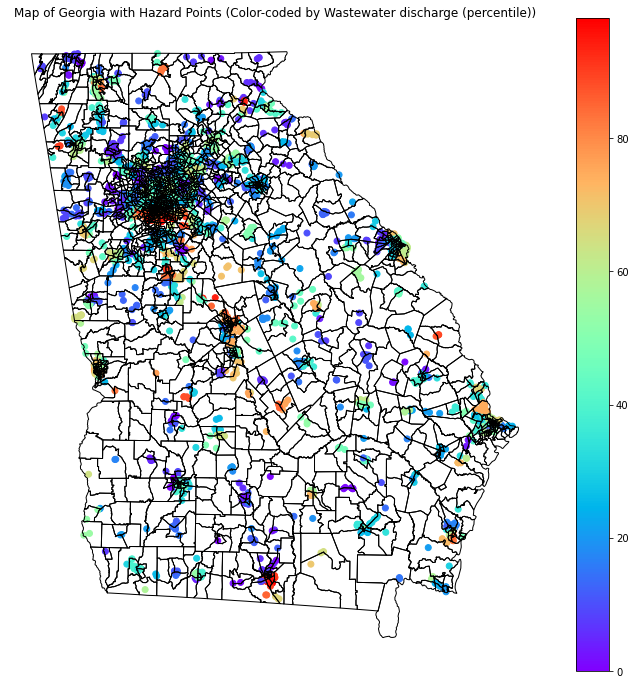

In [27]:
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(12, 12))
tract.boundary.plot(ax=ax, linewidth=1, color="black") # plot Georgia map based on tract

# Plot the points with a color gradient based on 'Wastewater discharge'
norm = Normalize(merged_df['Wastewater discharge (percentile)'].min(), merged_df['Wastewater discharge (percentile)'].max())
merged_df.plot(ax=ax, column='Wastewater discharge (percentile)', legend=True, cmap='rainbow', norm=norm)


plt.title("Map of Georgia with Hazard Points (Color-coded by Wastewater discharge (percentile)")
plt.axis("off")
plt.show()
